# Albedo Estimator

## Measuring Albedo is Hard

### Use models so we don't actually have to measure it!

This notebook does one task: take in a real data model created by the ModelViewer and compare it to simulated data models at different albedos in order to calculate the real data albedo.

In [115]:
#CELL 1: READ IN DATA.

#This is an array that holds the filenames of all models to be loaded. If you make a new model, add it to the list.
#To NOT plot a model, just comment it out. Easy!

albedoModel = [
    #LAMBERTIAN MODEL DOOSE 
    ["lambSimA0.0_0.93um.npy","Lambertian Model 0.9um A0.0"],
    ["lambSimA0.0_1.08um.npy","Lambertian Model 1um A0.0"],
    ["lambSimA0.0_1.27um.npy","Lambertian Model 1.3um A0.0"],
    ["lambSimA0.0_1.59um.npy","Lambertian Model 1.6um A0.0"],
    ["lambSimA0.0_2.01um.npy","Lambertian Model 2um A0.0"],
    ["lambSimA0.0_2.69um.npy","Lambertian Model 2.7um A0.0"],
    ["lambSimA0.0_2.79um.npy","Lambertian Model 2.8um A0.0"],
    ["lambSimA0.0_5.00um.npy","Lambertian Model 5um A0.0"],
    
    ["lambSimA0.1_0.93um.npy","Lambertian Model 0.9um A0.1"],
    ["lambSimA0.1_1.08um.npy","Lambertian Model 1um A0.1"],
    ["lambSimA0.1_1.27um.npy","Lambertian Model 1.3um A0.1"],
    ["lambSimA0.1_1.59um.npy","Lambertian Model 1.6um A0.1"],
    ["lambSimA0.1_2.01um.npy","Lambertian Model 2um A0.1"],
    ["lambSimA0.1_2.69um.npy","Lambertian Model 2.7um A0.1"],
    ["lambSimA0.1_2.79um.npy","Lambertian Model 2.8um A0.1"],
    ["lambSimA0.1_5.00um.npy","Lambertian Model 5um A0.1"],
    
    ["lambSimA0.2_0.93um.npy","Lambertian Model 0.9um A0.2"],
    ["lambSimA0.2_1.08um.npy","Lambertian Model 1um A0.2"],
    ["lambSimA0.2_1.27um.npy","Lambertian Model 1.3um A0.2"],
    ["lambSimA0.2_1.59um.npy","Lambertian Model 1.6um A0.2"],
    ["lambSimA0.2_2.01um.npy","Lambertian Model 2um A0.2"],
    ["lambSimA0.2_2.69um.npy","Lambertian Model 2.7um A0.2"],
    ["lambSimA0.2_2.79um.npy","Lambertian Model 2.8um A0.2"],
    ["lambSimA0.2_5.00um.npy","Lambertian Model 5um A0.2"],
]

modelNames = [ #Pick any set of 8, all wavelengths are expected.
    
    #SPECIFIC LOCATIONS
    #["huygens0.93um.npy","Huygens Landing Site 0.9um"],
    #["huygens1.08um.npy","Huygens Landing Site 1um"],
    #["huygens1.27um.npy","Huygens Landing Site 1.3um"],
    #["huygens1.59um.npy","Huygens Landing Site 1.6um"],
    #["huygens2.01um.npy","Huygens Landing Site 2um"],
    #["huygens2.69um.npy","Huygens Landing Site 2.7um"],
    #["huygens2.79um.npy","Huygens Landing Site 2.8um"],
    #["huygens5.00um.npy","Huygens Landing Site 5um"],
    
    #["hoteiRegio0.93um.npy","Hotei Regio 0.9um"],
    #["hoteiRegio1.08um.npy","Hotei Regio 1um"],
    #["hoteiRegio1.27um.npy","Hotei Regio 1.3um"],
    #["hoteiRegio1.59um.npy","Hotei Regio 1.6um"],
    #["hoteiRegio2.01um.npy","Hotei Regio 2um"],
    #["hoteiRegio2.69um.npy","Hotei Regio 2.7um"],
    #["hoteiRegio2.79um.npy","Hotei Regio 2.8um"],
    #["hoteiRegio5.00um.npy","Hotei Regio 5um"],
    
    #["tuiRegio0.93um.npy","Tui Regio 0.9um"],
    #["tuiRegio1.08um.npy","Tui Regio 1um"],
    #["tuiRegio1.27um.npy","Tui Regio 1.3um"],
    #["tuiRegio1.59um.npy","Tui Regio 1.6um"],
    #["tuiRegio2.01um.npy","Tui Regio 2um"],
    #["tuiRegio2.69um.npy","Tui Regio 2.7um"],
    #["tuiRegio2.79um.npy","Tui Regio 2.8um"],
    #["tuiRegio5.00um.npy","Tui Regio 5um"],
    
    #EQUATORIAL DATA BY TERRAIN
    #["equator0.93umDunes.npy","Equatorial Dunes 0.9um"],
    #["equator1.08umDunes.npy","Equatorial Dunes 1um"],
    #["equator1.27umDunes.npy","Equatorial Dunes 1.3um"],
    #["equator1.59umDunes.npy","Equatorial Dunes 1.6um"],
    #["equator2.01umDunes.npy","Equatorial Dunes 2um"],
    #["equator2.69umDunes.npy","Equatorial Dunes 2.7um"],
    #["equator2.79umDunes.npy","Equatorial Dunes 2.8um"],
    #["equator5.00umDunes.npy","Equatorial Dunes 5um"],
    
    #["equator0.93umPlains.npy","Equatorial Plains 0.9um"],
    #["equator1.08umPlains.npy","Equatorial Plains 1um"],
    #["equator1.27umPlains.npy","Equatorial Plains 1.3um"],
    #["equator1.59umPlains.npy","Equatorial Plains 1.6um"],
    #["equator2.01umPlains.npy","Equatorial Plains 2um"],
    #["equator2.69umPlains.npy","Equatorial Plains 2.7um"],
    #["equator2.79umPlains.npy","Equatorial Plains 2.8um"],
    #["equator5.00umPlains.npy","Equatorial Plains 5um"],

    #["equator0.93umHummocky.npy","Equatorial Hummocks 0.9um"],
    #["equator1.08umHummocky.npy","Equatorial Hummocks 1um"],
    #["equator1.27umHummocky.npy","Equatorial Hummocks 1.3um"],
    #["equator1.59umHummocky.npy","Equatorial Hummocks 1.6um"],
    #["equator2.01umHummocky.npy","Equatorial Hummocks 2um"],
    #["equator2.69umHummocky.npy","Equatorial Hummocks 2.7um"],
    #["equator2.79umHummocky.npy","Equatorial Hummocks 2.8um"],
    #["equator5.00umHummocky.npy","Equatorial Hummocks 5um"],
    
    #["equator0.93umXanadu.npy","Xanadu 0.9um"],
    #["equator1.08umXanadu.npy","Xanadu 1um"],
    #["equator1.27umXanadu.npy","Xanadu 1.3um"],
    #["equator1.59umXanadu.npy","Xanadu 1.6um"],
    #["equator2.01umXanadu.npy","Xanadu 2um"],
    #["equator2.69umXanadu.npy","Xanadu 2.7um"],
    #["equator2.79umXanadu.npy","Xanadu 2.8um"],
    #["equator5.00umXanadu.npy","Xanadu 5um"],
    
    #["equator0.93umCrater.npy","Major Craters 0.9um"],
    #["equator1.08umCrater.npy","Major Craters 1.3um"], 
    #["equator1.27umCrater.npy","Major Craters 1.3um"],
    #["equator1.59umCrater.npy","Major Craters 1.6um"],
    #["equator2.01umCrater.npy","Major Craters 2um"],
    #["equator2.69umCrater.npy","Major Craters 2.7um"],
    #["equator2.79umCrater.npy","Major Craters 2.8um"],
    #["equator5.00umCrater.npy","Major Craters 5um"],

    #NORTH POLAR DATA BY TERRAIN
    ["northPole0.93umLake.npy","North Polar Lakes 0.9um"],
    ["northPole1.08umLake.npy","North Polar Lakes 1um"],
    ["northPole1.27umLake.npy","North Polar Lakes 1.3um"],
    ["northPole1.59umLake.npy","North Polar Lakes 1.6um"],
    ["northPole2.01umLake.npy","North Polar Lakes 2um"],
    ["northPole2.69umLake.npy","North Polar Lakes 2.7um"],
    ["northPole2.79umLake.npy","North Polar Lakes 2.8um"],
    ["northPole5.00umLake.npy","North Polar Lakes 5um"],
    
    #["northPole0.93umPlains.npy","North Polar Plains 0.9um"],
    #["northPole1.08umPlains.npy","North Polar Plains 1um"],
    #["northPole1.27umPlains.npy","North Polar Plains 1.3um"],
    #["northPole1.59umPlains.npy","North Polar Plains 1.6um"],
    #["northPole2.01umPlains.npy","North Polar Plains 2um"],
    #["northPole2.69umPlains.npy","North Polar Plains 2.7um"],
    #["northPole2.79umPlains.npy","North Polar Plains 2.8um"],
    #["northPole5.00umPlains.npy","North Polar Plains 5um"],
    
    #OLD SIM MODELS
    #["oldSpecSim0.93um.npy","Old Specular Model 0.9um"],
    #["oldSpecSim1.08um.npy","Old Specular Model 1um"],
    #["oldSpecSim1.27um.npy","Old Specular Model 1.3um"],
    #["oldSpecSim1.59um.npy","Old Specular Model 1.6um"],
    #["oldSpecSim2.01um.npy","Old Specular Model 2um"],
    #["oldSpecSim2.69um.npy","Old Specular Model 2.7um"],
    #["oldSpecSim2.79um.npy","Old Specular Model 2.8um"],
    #["oldSpecSim5.00um.npy","Old Specular Model 5um"],

    #["oldLambSim0.93um.npy","Old Lambertian Model 0.9um"],
    #["oldLambSim1.08um.npy","Old Lambertian Model 1um"],
    #["oldLambSim1.27um.npy","Old Lambertian Model 1.3um"],
    #["oldLambSim1.59um.npy","Old Lambertian Model 1.6um"],
    #["oldLambSim2.01um.npy","Old Lambertian Model 2um"],
    #["oldLambSim2.69um.npy","Old Lambertian Model 2.7um"],
    #["oldLambSim2.79um.npy","Old Lambertian Model 2.8um"],
    #["oldLambSim5.00um.npy","Old Lambertian Model 5um"],

]

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

#Add more files to load in as you desire. The format for doing so should be self-evident.

loadedAlbedoModels = []
for filename in albedoModel:
    truename = "..\\ModelCreator\\" + filename[0]
    loadedAlbedoModels.append(np.load(truename)) #The first name is the one we want, the second is just a label.

#Clean the models, some may retain nans or -1 values. Set these to 0. 
#originally the code was able to handle these but I have no idea what I changed to break it. So we clean them here.
i,j,k,m = 0,0,0,0
while (m < len(loadedAlbedoModels)):
    i = 0
    while (i < len(loadedAlbedoModels[0])):
        j = 0
        while (j < len(loadedAlbedoModels[0][0])):
            k = 0
            while (k < len(loadedAlbedoModels[0][0][0])):
                if (math.isnan(loadedAlbedoModels[m][i][j][k] )):
                    loadedAlbedoModels[m][i][j][k]  = 0
                elif (loadedAlbedoModels[m][i][j][k] < 0):
                    loadedAlbedoModels[m][i][j][k] = 0
                k = k+1
            j = j+1
        i = i+1
    m = m+1

loadedModel = []
for filename in modelNames:
    truename = "..\\ModelCreator\\" + filename[0]
    loadedModel.append(np.load(truename)) #The first name is the one we want, the second is just a label.

#Clean the models, some may retain nans or -1 values. Set these to 0. 
#originally the code was able to handle these but I have no idea what I changed to break it. So we clean them here.
i,j,k,m = 0,0,0,0
while (m < len(loadedModel)):
    i = 0
    while (i < len(loadedModel[0])):
        j = 0
        while (j < len(loadedModel[0][0])):
            k = 0
            while (k < len(loadedModel[0][0][0])):
                if (math.isnan(loadedModel[m][i][j][k] )):
                    loadedModel[m][i][j][k]  = 0
                elif (loadedModel[m][i][j][k] < 0):
                    loadedModel[m][i][j][k] = 0
                k = k+1
            j = j+1
        i = i+1
    m = m+1

print(len(loadedAlbedoModels))
print(len(loadedModel))

24
8


In [116]:
X = 21
Y = 19
Z = 37
W = 8
albedoResults = [[[[0 for x in range(W)] for x in range(Z)] for x in range(Y)] for x in range(X)]

i,j,k = 0,0,0
w = 0
i = 0
while (i < len(albedoResults)):
    j = 0
    while (j < len(albedoResults[0])):
        k = 0
        while (k < len(albedoResults[0][0])):
            w = 0
            while (w < 8):
                realData = loadedModel[w][i][j][k] #Look if we don't have any data here don't bother.
                if (realData <= 0): #Look if we don't have any data here don't bother.
                    albedoResults[i][j][k][w] = -100.0
                    w=w+1
                    continue
                modelValues = [0,0,0]
                modelValues[0] = loadedAlbedoModels[w][i][j][k]
                modelValues[1] = loadedAlbedoModels[w+8][i][j][k]
                modelValues[2] = loadedAlbedoModels[w+16][i][j][k]
                if (modelValues[0] <= 0 or modelValues[1] <= 0 or modelValues[2] <= 0): #Need to make sure these exist as well even though I suspect this will never trigger, better safe than sorry. 
                    albedoResults[i][j][k][w] = -100.0
                    w=w+1
                    continue
                #So we can't just assume these three points are in a row. 
                #Fortunately we can demand that they BE in order, since points that aren't in order are regularly going to not give valid values.
                #Only use points that clearly follow the trend:
                if (modelValues[0] < modelValues[1] and modelValues[0] < modelValues[2] and modelValues[1] < modelValues[2]):
                    #Line of Regression / Least Squares Fit  taken from Taylor's Error Analysis 3rd Ed 
                    #the x variable is I over F, or IoF
                    #the y variable is albedo
                    sumIoF = modelValues[0] + modelValues[1] + modelValues[2]
                    sumIoFsquare = modelValues[0]**2 + modelValues[1]**2 + modelValues[2]**2
                    delta = (3 * sumIoFsquare) - (sumIoF**2)
                    if (delta <= 0): #Avoid mathematical problems with values that aren't anything.
                        albedoResults[i][j][k][w] = -100.0
                        w=w+1
                        continue
                    sumAlbedo = 0.3 #0 + .1 + .2
                    sumIoFAlbedo = modelValues[1]*0.1 + modelValues[2]*0.2 #First value is at IoF = 0.
                    yIntercept = (sumIoFsquare*sumAlbedo - sumIoF*sumIoFAlbedo)/delta
                    slope = (3.*sumIoFAlbedo - sumIoF*sumAlbedo)/delta
                    
                    estimatedAlbedo = slope*realData + yIntercept
                    albedoResults[i][j][k][w] = float(estimatedAlbedo)
                else:
                    albedoResults[i][j][k][w] = -100.0
                w=w+1
            k = k+1
        j = j+1
    i = i+1

#print(albedoResults[0])

In [117]:
#Global data analysis holders
dumbAveAlb = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
dumbStdDev = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
dumbCounters = [0,0,0,0,0,0,0,0]
fullSequence = [[],[],[],[],[],[],[],[]]

#Slicing data analysis holders.
inciSlicer = [[[] for x in range(X)] for x in range(8)]
emisSlicer = [[[] for x in range(Y)] for x in range(8)]
azimSlicer = [[[] for x in range(Z)] for x in range(8)] #one dimension for wavelength, one for the angle we're slicing over.

i,j,k,w = 0,0,0,0
while (i < len(albedoResults)):
    j = 0
    while (j < len(albedoResults[0])):
        k = 0
        while (k < len(albedoResults[0][0])):
            w = 0
            while (w < 8):
                if (albedoResults[i][j][k][w] > -100 and albedoResults[i][j][k][w] < 100):
                    dumbAveAlb[w] = dumbAveAlb[w] + albedoResults[i][j][k][w]
                    dumbCounters[w] = dumbCounters[w] + 1
                    fullSequence[w].append(albedoResults[i][j][k][w])
                    inciSlicer[w][i].append(albedoResults[i][j][k][w])
                    emisSlicer[w][j].append(albedoResults[i][j][k][w])
                    azimSlicer[w][k].append(albedoResults[i][j][k][w])
                w=w+1
            k = k+1
        j = j+1
    i = i+1

w=0
while (w < 8):
    dumbAveAlb[w] = dumbAveAlb[w] / dumbCounters[w]
    dumbStdDev[w] = float(np.std(fullSequence[w]))
    w=w+1



print(dumbAveAlb)
print(dumbStdDev)

[2.627133082849187, -0.14519177531898883, 0.28447982808967587, -0.03491315477920934, 0.12837382027154984, 0.1444944941665369, 0.10611953383659063, -0.012087103079692862]
[3.303679806703353, 0.31980971801197094, 0.430411377723289, 0.2332055544493235, 0.3115975216789793, 0.5560287802585072, 0.3570037127649638, 0.2118251786316355]


C:\Users\deran\AppData\Local\Temp\ipykernel_64092\2379891942.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylim=(-1,1), xlabel="Windows", ylabel="Estimated Albedo", title = "Estimated Albedo Distributions: Dunes", xticklabels = windowLabels) #This throws a warning for the tick labels but it works so I'm not complanining


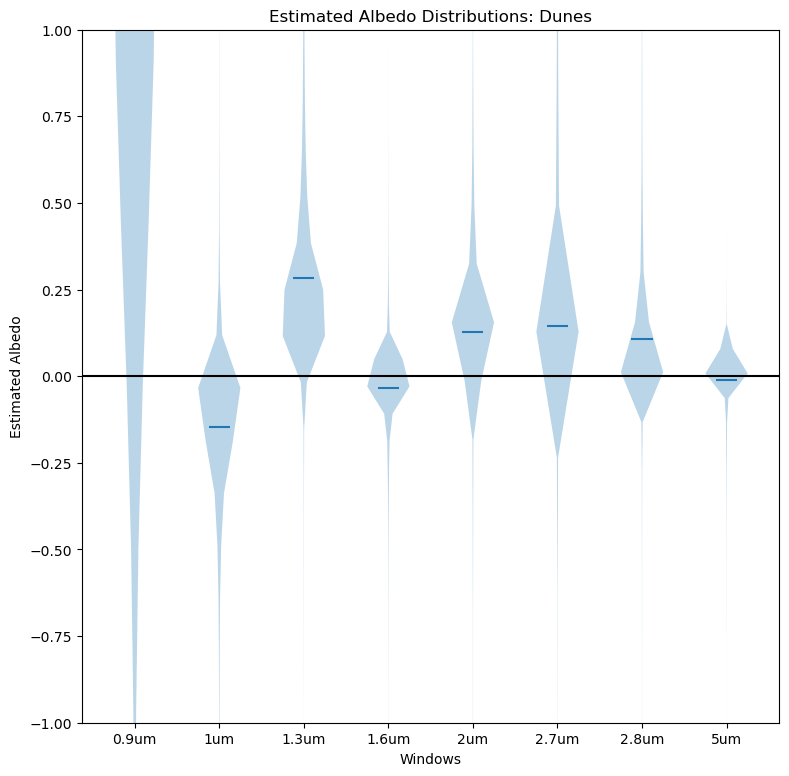

In [118]:
#VIOLIN PLOT! For, y'know, fun!

fig, ax = plt.subplots(figsize=(9,9))

windowLabels = ["-", "0.9um", "1um", "1.3um", "1.6um", "2um", "2.7um", "2.8um", "5um"] 
ax.violinplot(fullSequence, showmeans=True, showmedians=False, showextrema = False)
ax.set(ylim=(-1,1), xlabel="Windows", ylabel="Estimated Albedo", title = "Estimated Albedo Distributions: Dunes", xticklabels = windowLabels) #This throws a warning for the tick labels but it works so I'm not complanining
plt.axhline(y=0,color='k')

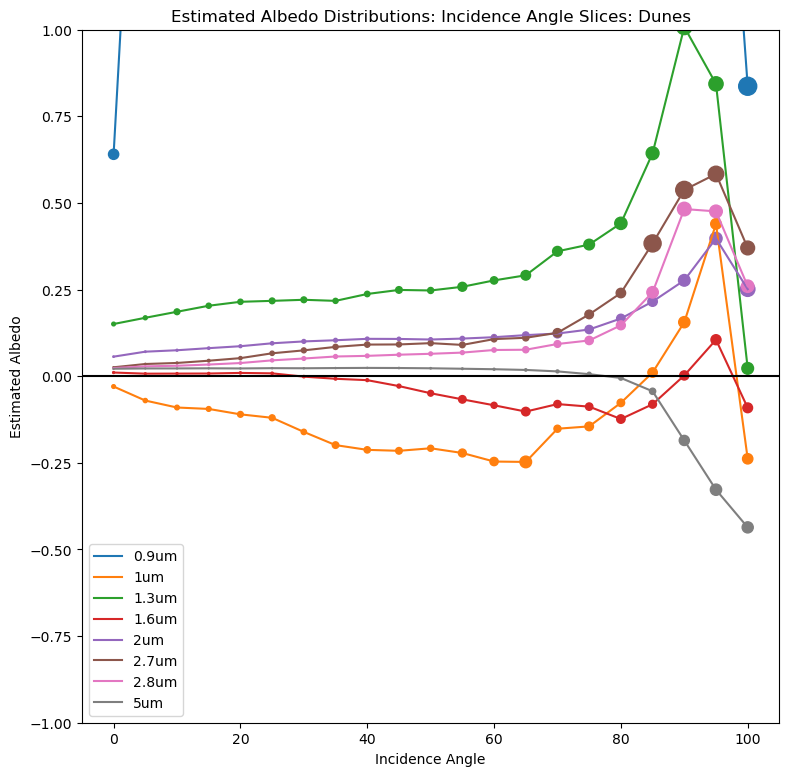

In [119]:
#Incidence Slice Examiner
fig, ax = plt.subplots(figsize=(9,9))

x = np.linspace(0,100,X)
yResults = [[0 for x in range(X)] for x in range(8)]
yErr = [[0 for x in range(X)] for x in range(8)]

w=0
while (w < 8):
    i = 0
    while (i < X):
        yResults[w][i] = np.average(inciSlicer[w][i])
        yErr[w][i] = np.std(inciSlicer[w][i])*100
        i = i+1
    w = w+1

ax.plot(x, yResults[0], label="0.9um")
ax.scatter(x, yResults[0], s = yErr[0])
ax.plot(x, yResults[1], label="1um")
ax.scatter(x, yResults[1], s = yErr[1])
ax.plot(x, yResults[2],label = "1.3um")
ax.scatter(x, yResults[2], s = yErr[2])
ax.plot(x, yResults[3], label = "1.6um")
ax.scatter(x, yResults[3], s = yErr[3])
ax.plot(x, yResults[4], label = "2um")
ax.scatter(x, yResults[4], s = yErr[4])
ax.plot(x, yResults[5], label = "2.7um")
ax.scatter(x, yResults[5], s = yErr[5])
ax.plot(x, yResults[6],  label = "2.8um")
ax.scatter(x, yResults[6], s = yErr[6])
ax.plot(x, yResults[7], label = "5um")
ax.scatter(x, yResults[7], s = yErr[7])

ax.set(ylim=(-1,1), xlabel="Incidence Angle", ylabel="Estimated Albedo", title = "Estimated Albedo Distributions: Incidence Angle Slices: Dunes") #This throws a warning for the tick labels but it works so I'm not complanining
plt.axhline(y=0,color='k')
ax.legend()

\\?\C:\Users\deran\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
\\?\C:\Users\deran\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
\\?\C:\Users\deran\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\numpy\_core\_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
\\?\C:\Users\deran\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
\\?\C:\Users\deran\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered

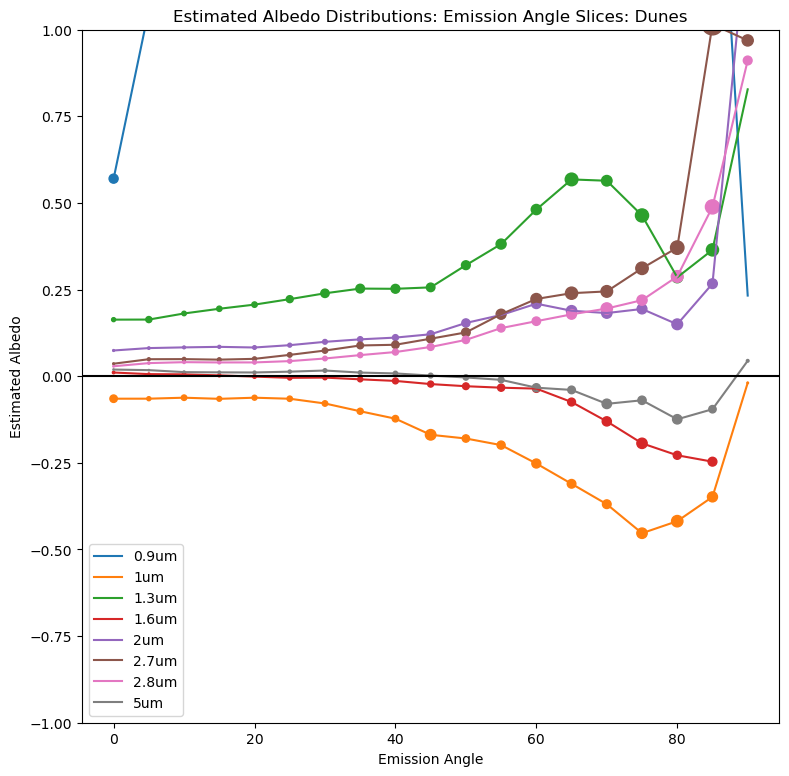

In [120]:
#Emission Slice Examiner
fig, ax = plt.subplots(figsize=(9,9))

x = np.linspace(0,90,Y)
yResults = [[0 for x in range(Y)] for x in range(8)]
yErr = [[0 for x in range(Y)] for x in range(8)]

w=0
while (w < 8):
    i = 0
    while (i < Y):
        yResults[w][i] = np.average(emisSlicer[w][i])
        yErr[w][i] = np.std(emisSlicer[w][i])*100
        i = i+1
    w = w+1

ax.plot(x, yResults[0], label="0.9um")
ax.scatter(x, yResults[0], s = yErr[0])
ax.plot(x, yResults[1], label="1um")
ax.scatter(x, yResults[1], s = yErr[1])
ax.plot(x, yResults[2],label = "1.3um")
ax.scatter(x, yResults[2], s = yErr[2])
ax.plot(x, yResults[3], label = "1.6um")
ax.scatter(x, yResults[3], s = yErr[3])
ax.plot(x, yResults[4], label = "2um")
ax.scatter(x, yResults[4], s = yErr[4])
ax.plot(x, yResults[5], label = "2.7um")
ax.scatter(x, yResults[5], s = yErr[5])
ax.plot(x, yResults[6],  label = "2.8um")
ax.scatter(x, yResults[6], s = yErr[6])
ax.plot(x, yResults[7], label = "5um")
ax.scatter(x, yResults[7], s = yErr[7])

ax.set(ylim=(-1,1), xlabel="Emission Angle", ylabel="Estimated Albedo", title = "Estimated Albedo Distributions: Emission Angle Slices: Dunes") #This throws a warning for the tick labels but it works so I'm not complanining
plt.axhline(y=0,color='k')
ax.legend()

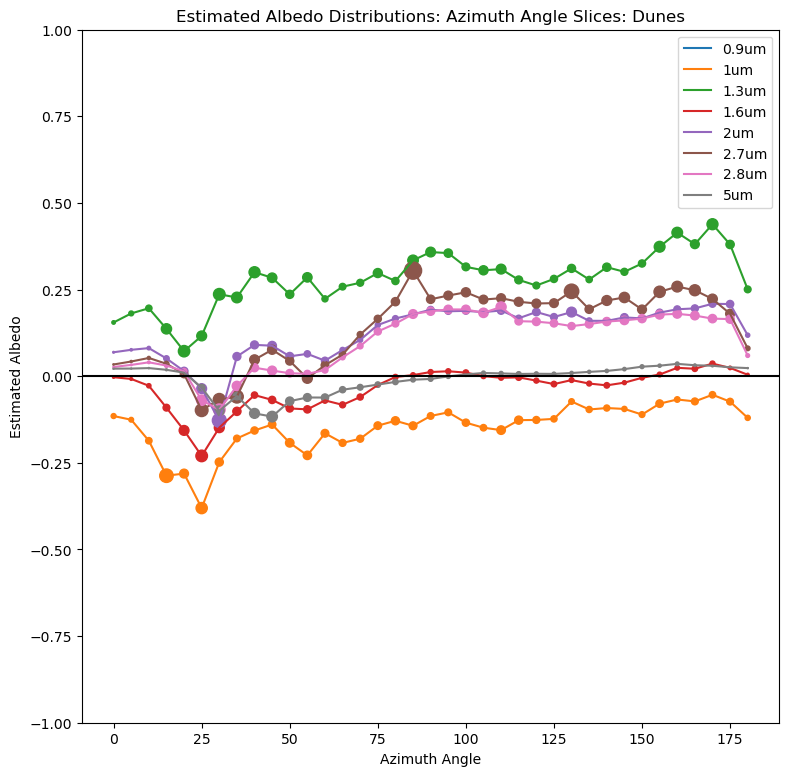

In [121]:
#Azimuth Slice Examiner
fig, ax = plt.subplots(figsize=(9,9))

x = np.linspace(0,180,Z)
yResults = [[0 for x in range(Z)] for x in range(8)]
yErr = [[0 for x in range(Z)] for x in range(8)]

w=0
while (w < 8):
    i = 0
    while (i < Z):
        yResults[w][i] = np.average(azimSlicer[w][i])
        yErr[w][i] = np.std(azimSlicer[w][i])*100
        i = i+1
    w = w+1

ax.plot(x, yResults[0], label="0.9um")
ax.scatter(x, yResults[0], s = yErr[0])
ax.plot(x, yResults[1], label="1um")
ax.scatter(x, yResults[1], s = yErr[1])
ax.plot(x, yResults[2],label = "1.3um")
ax.scatter(x, yResults[2], s = yErr[2])
ax.plot(x, yResults[3], label = "1.6um")
ax.scatter(x, yResults[3], s = yErr[3])
ax.plot(x, yResults[4], label = "2um")
ax.scatter(x, yResults[4], s = yErr[4])
ax.plot(x, yResults[5], label = "2.7um")
ax.scatter(x, yResults[5], s = yErr[5])
ax.plot(x, yResults[6],  label = "2.8um")
ax.scatter(x, yResults[6], s = yErr[6])
ax.plot(x, yResults[7], label = "5um")
ax.scatter(x, yResults[7], s = yErr[7])

ax.set(ylim=(-1,1), xlabel="Azimuth Angle", ylabel="Estimated Albedo", title = "Estimated Albedo Distributions: Azimuth Angle Slices: Dunes") #This throws a warning for the tick labels but it works so I'm not complanining
plt.axhline(y=0,color='k')
ax.legend()

C:\Users\deran\AppData\Local\Temp\ipykernel_64092\3121831537.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(ylim = (-0.5,1.5), xlabel="Windows", ylabel="Estimated Albedo", title = "Estimated Albedos: Various Terrains", xticklabels = windowLabels)


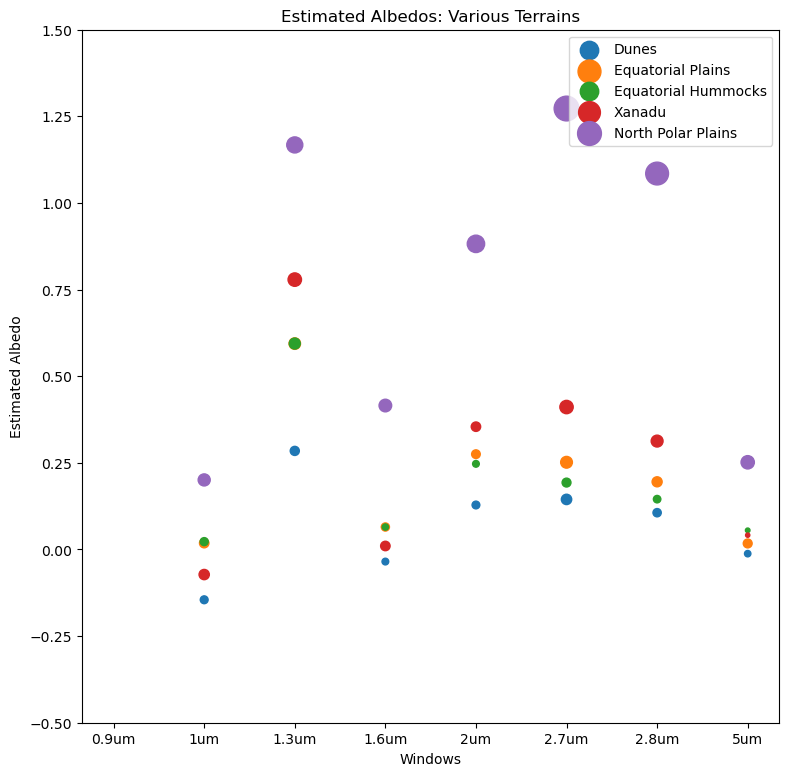

In [141]:
duneAvgs = [2.627133082849187, -0.14519177531898883, 0.28447982808967587, -0.03491315477920934, 0.12837382027154984, 0.1444944941665369, 0.10611953383659063, -0.012087103079692862]
duneDevs = [3.303679806703353, 0.31980971801197094, 0.430411377723289, 0.2332055544493235, 0.3115975216789793, 0.5560287802585072, 0.3570037127649638, 0.2118251786316355]

plainAvgs = [3.321266088734002, 0.01830342424191951, 0.5941367125994859, 0.06484568914998248, 0.27507734735538086, 0.25166407177699407, 0.19527796556903923, 0.017382650149376278]
plainDevs = [5.079640459759761, 0.4601700884840758, 0.6869729513418917, 0.34639574554912167, 0.38695545871114867, 0.7136829981249746, 0.5240482423165739, 0.40842056625514433]

hummAvgs = [3.4740587581887437, 0.022627326893690243, 0.5942938927350134, 0.0646980949785184, 0.24713261500001327, 0.1930814555184798, 0.14520783744953353, 0.05528593219072167]
hummDevs = [3.4203791651295736, 0.33564701338059705, 0.627089319135932, 0.2052717094468777, 0.232214899296664, 0.4082249256747925, 0.2885076059983405, 0.10853849759219975]

xanaAvgs = [3.800158175184366, -0.07238713054311519, 0.778831796575539, 0.010084816056185447, 0.35437422598921275, 0.4110628619397439, 0.31281955345511486, 0.0413084495460221]
xanaDevs = [4.831267951870688, 0.548143320873117, 0.9354797294303494, 0.46420155448517925, 0.46082758284113506, 0.9226451550252012, 0.7314509472205211, 0.09423879659461547]

northPlainAvgs = [3.5613897342850223, 0.200715710133864, 1.167524653708374, 0.41541047745383985, 0.8820188066235208, 1.2725537761783794, 1.0849346382450333, 0.25161211296972524]
northPlainDevs = [5.127660978986991, 0.7555327183993988, 1.3378526173889178, 0.8256234672740735, 1.5650348625602561, 3.1722112950828296, 2.691724282258392, 0.919504626613477]

windowLabels = ["0.9um", "1um", "1.3um", "1.6um", "2um", "2.7um", "2.8um", "5um"] 
x = np.linspace(1,8,8)

fig, ax = plt.subplots(figsize=(9,9))
ax.scatter(windowLabels, duneAvgs, label="Dunes",s = np.array(duneDevs)*100)
#ax.errorbar(windowLabels, duneAvgs, yerr=duneDevs, fmt="o")
ax.scatter(windowLabels, plainAvgs, label="Equatorial Plains",s = np.array(plainDevs)*100)
ax.scatter(windowLabels, hummAvgs, label="Equatorial Hummocks",s = np.array(hummDevs)*100)
ax.scatter(windowLabels, xanaAvgs, label="Xanadu",s = np.array(xanaDevs)*100)
ax.scatter(windowLabels, northPlainAvgs, label="North Polar Plains",s = np.array(northPlainDevs)*100)

ax.set(ylim = (-0.5,1.5), xlabel="Windows", ylabel="Estimated Albedo", title = "Estimated Albedos: Various Terrains", xticklabels = windowLabels)

ax.legend()